In [2]:
import pandas as pd

In [3]:
file = pd.read_csv("D:\\Downloads\\Mall_Customers.csv")

In [4]:
file

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


In [5]:
x = file[['Annual Income (k$)', 'Spending Score (1-100)']].values

In [6]:
x

array([[ 15,  39],
       [ 15,  81],
       [ 16,   6],
       [ 16,  77],
       [ 17,  40],
       [ 17,  76],
       [ 18,   6],
       [ 18,  94],
       [ 19,   3],
       [ 19,  72],
       [ 19,  14],
       [ 19,  99],
       [ 20,  15],
       [ 20,  77],
       [ 20,  13],
       [ 20,  79],
       [ 21,  35],
       [ 21,  66],
       [ 23,  29],
       [ 23,  98],
       [ 24,  35],
       [ 24,  73],
       [ 25,   5],
       [ 25,  73],
       [ 28,  14],
       [ 28,  82],
       [ 28,  32],
       [ 28,  61],
       [ 29,  31],
       [ 29,  87],
       [ 30,   4],
       [ 30,  73],
       [ 33,   4],
       [ 33,  92],
       [ 33,  14],
       [ 33,  81],
       [ 34,  17],
       [ 34,  73],
       [ 37,  26],
       [ 37,  75],
       [ 38,  35],
       [ 38,  92],
       [ 39,  36],
       [ 39,  61],
       [ 39,  28],
       [ 39,  65],
       [ 40,  55],
       [ 40,  47],
       [ 40,  42],
       [ 40,  42],
       [ 42,  52],
       [ 42,  60],
       [ 43,

In [7]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

In [8]:
kmeans = None
def elbow_method():
    wcss=[]
    for i in range(1,11):
        global kmeans
        kmeans = KMeans(n_clusters=i, init='k-means++', random_state=0)
        kmeans.fit(x)
        wcss.append(kmeans.inertia_)
    plt.plot(range(1,11),wcss)
    plt.title('Elbow Method Graph')
    plt.xlabel('Number of Clusters(k)')
    plt.ylabel('wcss_list')
    plt.show()

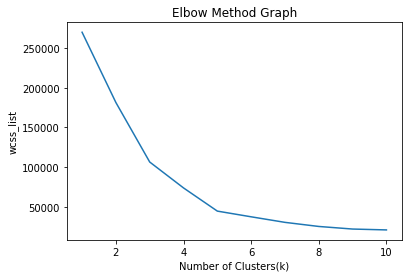

In [9]:
elbow_method()

In [10]:
final= KMeans(n_clusters=5, init='k-means++', random_state=42)
ymean=final.fit_predict(x)

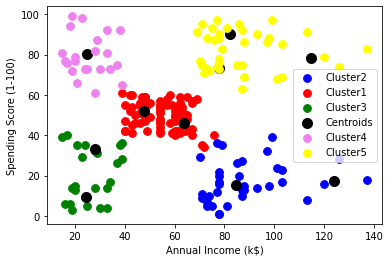

In [13]:
plt.scatter( x[ymean == 1, 0], x[ymean == 1, 1], s = 60, c = 'blue', label = 'Cluster2')
plt.scatter( x[ymean == 0, 0], x[ymean == 0, 1], s = 60, c = 'red', label = 'Cluster1') 
plt.scatter( x[ymean == 2, 0], x[ymean == 2, 1], s = 60, c = 'green', label = 'Cluster3') 
plt.scatter( kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 100, c = 'black', label = 'Centroids')
plt.scatter( x[ymean == 3, 0], x[ymean == 3, 1], s = 60, c = 'violet', label = 'Cluster4') 
plt.scatter( x[ymean == 4, 0], x[ymean == 4, 1], s = 60, c = 'yellow', label = 'Cluster5')
# plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 300, c = 'yellow', label = 'Centroid')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)') 
plt.legend() 
plt.show()